In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Load data

In [2]:
df = pd.read_csv('data/1-Total_Primary_Energy_Consumption_Annual.csv',skiprows=4,index_col='Year',parse_dates=True)
df.columns = ['total-primary-energy']
df = df.sort_index()
df.head()

,total-primary-energy
Year,
1949-01-01,31981.503
1950-01-01,34615.768
1951-01-01,36974.030
1952-01-01,36747.825
1953-01-01,37664.468


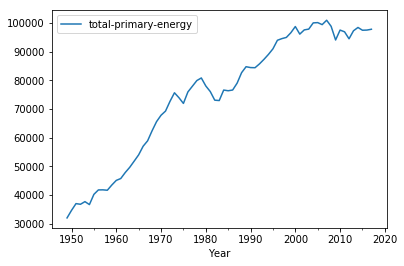

In [4]:
df.plot()

## stationary check

In [5]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):           
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [6]:
test_stationarity(df['total-primary-energy'])

Results of Dickey-Fuller Test:
Test Statistic                 -1.937448
p-value                         0.314655
#Lags Used                      3.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


**df['total-primary-energy'] is not stationary**

In [7]:
df['total_diff'] = df['total-primary-energy'].diff()
df.head()

,total-primary-energy,total_diff
Year,,
1949-01-01,31981.503,NaN
1950-01-01,34615.768,2634.265
1951-01-01,36974.030,2358.262
1952-01-01,36747.825,-226.205
1953-01-01,37664.468,916.643


In [8]:
test_stationarity(df['total_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -3.537456
p-value                         0.007076
#Lags Used                      2.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


**df['total_diff'] is stationary series**

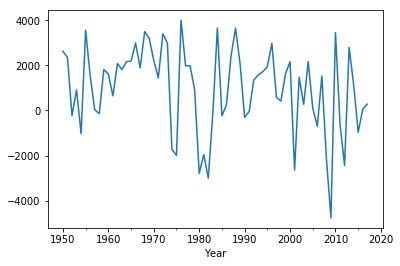

In [9]:
df['total_diff'].plot()

## Decomposition

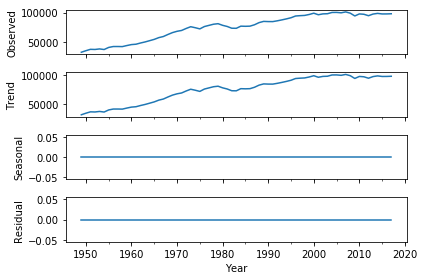

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df['total-primary-energy']).plot()
plt.show()

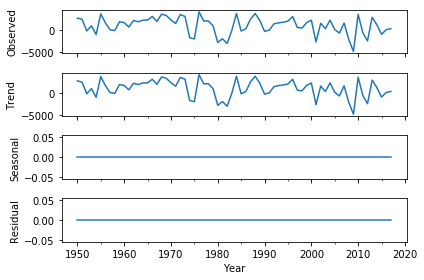

In [11]:
seasonal_decompose(df['total_diff'].dropna()).plot()
plt.show()

### ACF and PACF plots:

In [12]:
from statsmodels.tsa.stattools import acf, pacf

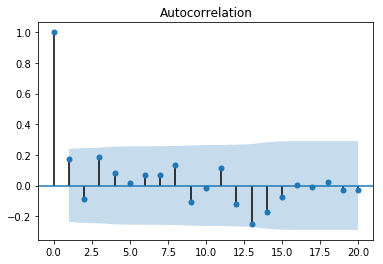

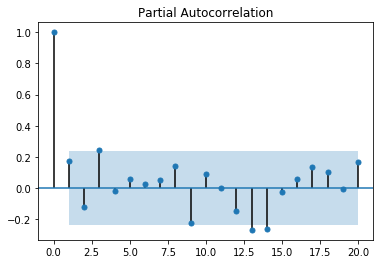

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['total_diff'].dropna(),lags=20)
plot_pacf(df['total_diff'].dropna(),lags=20)
plt.show()

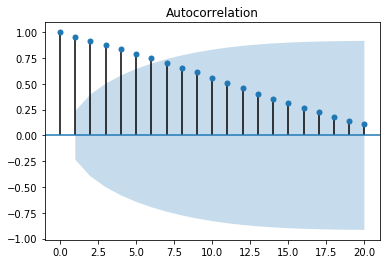

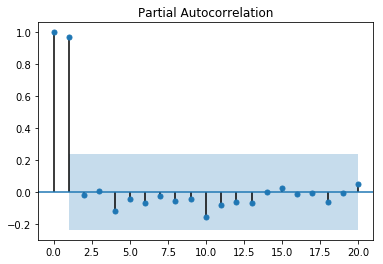

In [14]:
plot_acf(df['total-primary-energy'],lags=20)
plot_pacf(df['total-primary-energy'],lags=20)
plt.show()

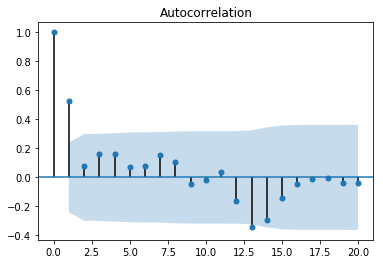

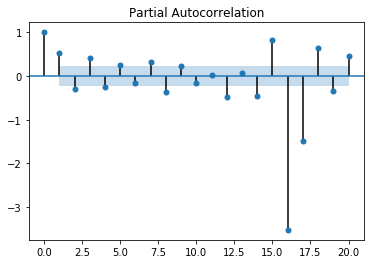

In [15]:
plot_acf(df['total-primary-energy'].diff(2).dropna(),lags=20)
plot_pacf(df['total-primary-energy'].diff(2).dropna(),lags=20)
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69 entries, 1949-01-01 to 2017-01-01
Data columns (total 2 columns):
total-primary-energy    69 non-null float64
total_diff              68 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


## Split data

In [17]:
train = pd.DataFrame(df['total-primary-energy'][:41])
valid = pd.DataFrame(df['total-primary-energy'][41:55])
test  = pd.DataFrame(df['total-primary-energy'][55:])

In [18]:
train.shape

(41, 1)

In [19]:
valid.shape

(14, 1)

In [20]:
test.shape

(14, 1)

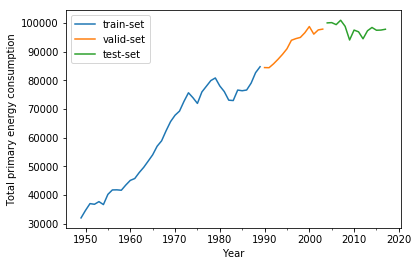

In [21]:
ax1 = train.plot()
valid.plot(ax=ax1)
test.plot(ax=ax1)
plt.legend(['train-set','valid-set','test-set'])
plt.ylabel('Total primary energy consumption')
plt.show()

## ARIMA model

In [22]:
from statsmodels.tsa.arima_model import ARIMA
# Forecasting a simulated model

In [28]:
warnings.filterwarnings("ignore")
i=0
for p in range(4):
    for d in range(4):
        for q in range(4): 
            try:
                model = ARIMA(train, order=(p,d,q))
                result = model.fit()
                print(i,p,d,q,result.aic,result.bic)
                i=i+1
            except:
                continue
            

0 0 0 0 918.1477969878712 921.5749411212798
1 0 0 1 869.9041071088113 875.0448233089243
2 0 1 0 718.9825648664398 722.3603237746677
3 0 1 1 715.5835931572369 720.6502315195787
4 0 1 2 717.5113422192194 724.2668600356751
5 0 1 3 719.5096993239488 727.9540965945184
6 0 2 0 713.6751826822965 717.0023059745558
7 0 2 1 707.2655574158152 712.2562423542042
8 0 2 2 703.5903490408509 710.2445956253695
9 1 0 0 760.6483058086517 765.7890220087646
10 1 0 1 750.5063356349198 757.360623901737
11 1 0 2 753.4735521142434 762.041412447765
12 1 0 3 755.0330161380335 765.3144485382594
13 1 1 0 716.7265312414919 721.7931696038337
14 1 1 1 717.5148002503653 724.270318066821
15 1 1 2 719.5103162798539 727.9547135504235
16 1 2 0 713.3946270382082 718.3853119765972
17 1 2 1 704.6298087520588 711.2840553365774
18 1 2 2 705.570962467687 713.8887706983352
19 1 2 3 nan nan
20 2 0 0 748.9493033845249 755.8035916513421
21 2 0 1 752.5769811784021 761.1448415119237
22 2 1 0 717.7037641229009 724.4592819393566
23 2 1 

**Minimum of AIC or BIC is at (p,d,q) = (0,2,2)**

In [29]:
model1 = ARIMA(train, order=(0,2,2))
result1 = model1.fit()
print(result1.summary())
print("μ={} ,ϕ={}".format(result1.params[0],result1.params[1]))

                                ARIMA Model Results                                
Dep. Variable:     D2.total-primary-energy   No. Observations:                   39
Model:                      ARIMA(0, 2, 2)   Log Likelihood                -347.795
Method:                            css-mle   S.D. of innovations           1733.380
Date:                     Mon, 10 Dec 2018   AIC                            703.590
Time:                             20:58:10   BIC                            710.245
Sample:                         01-01-1951   HQIC                           705.978
                              - 01-01-1989                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -17.1364     32.637     -0.525      0.603     -81.104      46.831
ma.L1.D2.total-primary-energy    -

[]

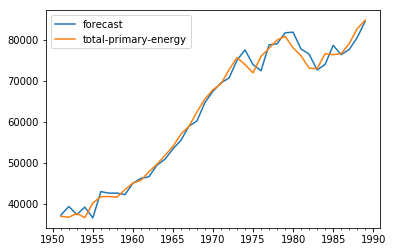

In [30]:
result1.plot_predict()
plt.plot()

In [32]:
#result.fittedvalues

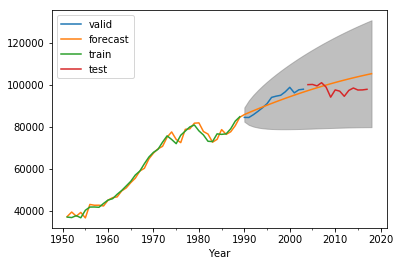

In [31]:
ax1 = valid.plot()
result1.plot_predict(2,69,ax=ax1)
test.plot(ax=ax1)
plt.legend(['valid','forecast','train','test'])
plt.show()